<a href="https://www.kaggle.com/code/golammostofas/pure-dbscan?scriptVersionId=153068080" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-for-dbscan/dbscan2000.pkl
/kaggle/input/dataset-for-dbscan/Clustering_gmm (2).csv
/kaggle/input/fetal-health-classification/fetal_health.csv
/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv
/kaggle/input/iadatasets/ID3/car.data
/kaggle/input/iadatasets/ID3/breast-cancer.data
/kaggle/input/iadatasets/dbscan/ds1.txt
/kaggle/input/iadatasets/dbscan/spiral.txt
/kaggle/input/iadatasets/dbscan/Aggregation.txt
/kaggle/input/iadatasets/kmeans-SOM/jain.txt
/kaggle/input/iadatasets/kmeans-SOM/unbalance.txt
/kaggle/input/iadatasets/kmeans-SOM/Aggregation.txt
/kaggle/input/iadatasets/knn-CNN-NNSRM/data_banknote_authentication.txt
/kaggle/input/iadatasets/knn-CNN-NNSRM/Compound.txt
/kaggle/input/iadatasets/knn-CNN-NNSRM/wine.txt
/kaggle/input/iadatasets/Aprendizagem Probabili╠üstica/car.data
/kaggle/input/iadatasets/Aprendizagem Probabili╠üstica/breast-cancer.data
/kaggle/input/iadatasets/Aprendizagem Probabili╠üstica/balance-scale.data
/kaggle/input/

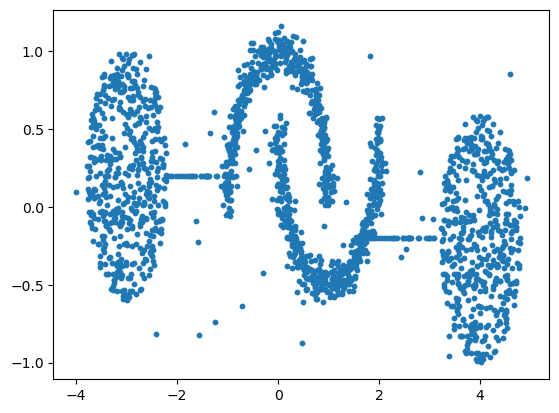

In [3]:
df = pd.read_pickle("/kaggle/input/dataset-for-dbscan/dbscan2000.pkl")
plt.scatter(df[:,0] , df[:,1], s=10)
data = pd.DataFrame(dict(X=df[:, 0], Y=df[:, 1])) 
data = data.values

In [4]:
eps = 0.1
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)

Cluster labels: [ 0  1 -1 ...  2  0  2]


       idx  cluster
0        0        0
1        1        1
2        2       -1
3        3        0
4        4        0
...    ...      ...
1995  1995       -1
1996  1996        0
1997  1997        2
1998  1998        0
1999  1999        2

[2000 rows x 2 columns]


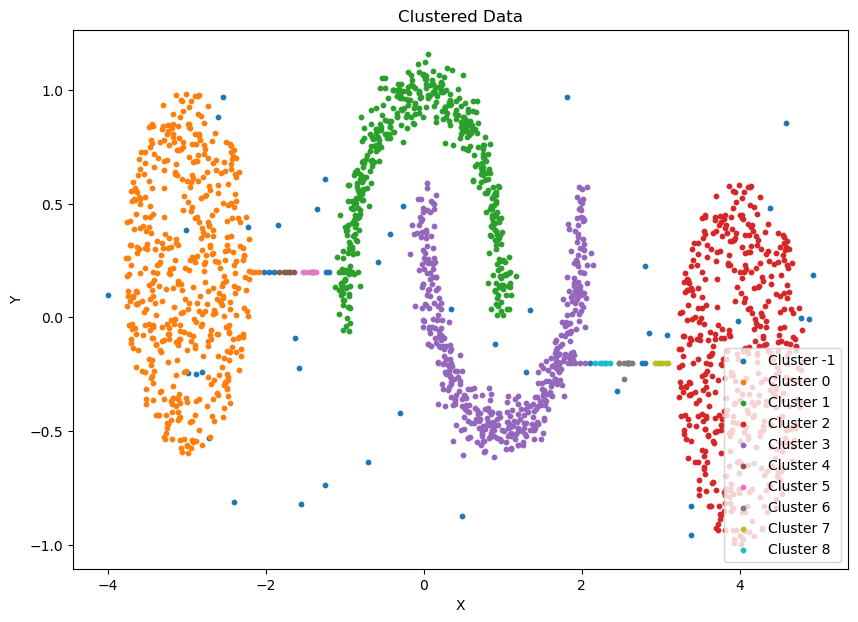

In [5]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(df[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], df[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([ 50, 500, 455, 499, 457,   6,  10,  11,   6,   6])

> # Moon DataSet

In [7]:

X, y= make_moons(n_samples=500, noise=0.06, random_state=0)

data = pd.DataFrame(dict(X=X[:, 0], Y=X[:, 1])) 
data = data.values
eps = 0.1
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)
dbscan.eps

Cluster labels: [ 0  1  1  1  1  0  1  1 -1  0  0  1  1  1  0  1  1  1  0  0  0  1  0  0
  0  1  0  1  0  0  1  0  0  0  1  1  1  1  1  0  1  0  1  0  0  0  0  1
  1  0  1  0  1  0  0  0  1  0  0  1  0  1  1  1  1  0  0  1  1  0  0  0
  1  1  0  1  1  0  1  1 -1  0 -1  0  1  1  1  0  1  0  0  1  1  0  0  1
  0  1  0  0  0  1  0  1 -1  1  0  0  1  0  1  0  0  0  1  1  1  1  0  0
  1  0  0  1  1  0  0  1  1  1  1  0  1  0  1  1  1  1  1  0  0  0  0  0
  1  0  1  1  0  0  0  1  0  1  0  0  0  0  1  0  1  0  0 -1  0  0  1  1
  1  1  1  0  1  1  1  0  1  0  1  1  1  0  0  1  0  1  1  1  1  0  1  1
  0  1  1  1  1  0  0  0  0  0  0  1  0  1  0  1  0  1  1  0  0  1  0  1
  0  0  0  1  0  0  0  0  1  1  0  0  0  0  1  0  1  0  1  1  1  0  0  1
  0  0  1  1  1  1  1  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  1  0
  1  1  1  0  0  1  1  0  1  1  0  0  0  1  1  1  0  1  0  0  0  0  1  0
  0  0  0  0  0  0  1  1  0  1  1  0  1  1  0  1  1  1  0  0  0  1  1  0
  0  0  0  1  0  1  0  0  1  1  1  

0.1

# Calculate evaluation metrics of Moon Dataset

In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
def evaluation(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    calinski_score = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)

    print("Silhouette Score:", silhouette_avg)
    print("Calinski-Harabasz Score:", calinski_score)
    print("Davies-Bouldin Score:", davies_bouldin)

In [9]:
evaluation(data, dbscan.labels_)

Silhouette Score: 0.23194850196288408
Calinski-Harabasz Score: 159.02182104769875
Davies-Bouldin Score: 2.7650252868913907


     idx  cluster
0      0        0
1      1        1
2      2        1
3      3        1
4      4        1
..   ...      ...
495  495        1
496  496        0
497  497        0
498  498        0
499  499        0

[500 rows x 2 columns]


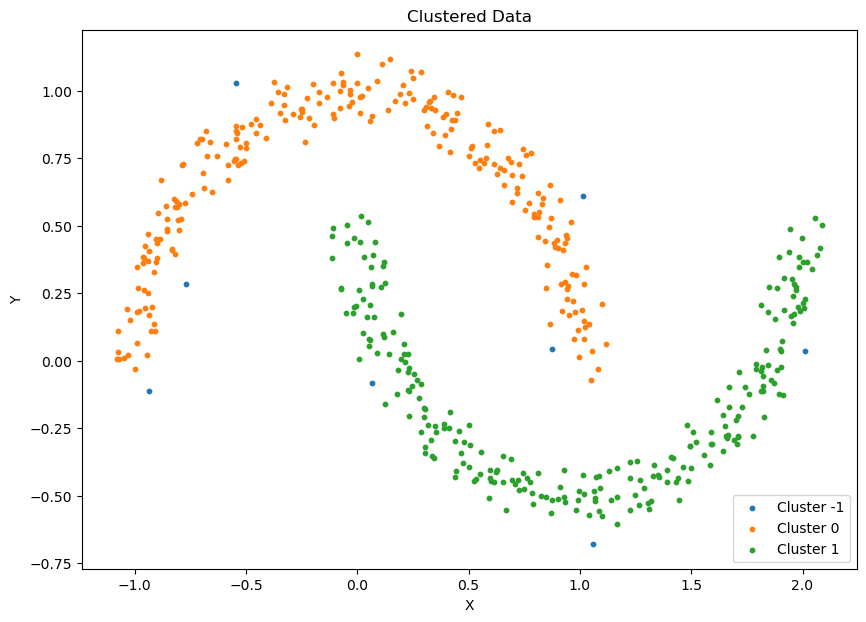

In [10]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [11]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([  8, 245, 247])

> # Circles Dataset

In [12]:
from sklearn import datasets
circle_df = datasets.make_circles(n_samples=500, noise=.09,factor=0.2, random_state=0)
X = circle_df[0]
data = X

In [13]:
eps = 0.1
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)
dbscan.eps

Cluster labels: [ 6  0  0  0  0 -1  0  0  1  1 -1  0  0  0  2  0  0  0  1 -1  3  0  4 -1
 13  0  5  0  6  4  0 -1 -1  7  0  0  0  0  0 -1  0 13  0 11  8 -1  3  0
  0  6  0  2  0  1 14  9  0 -1  4  0 10  0  0  0  0  7  9  0  0  8  1 -1
  0  0  2  0  0  6  0  0  0  4 -1 11  0  0  0 -1  0 -1 11  0  0  7 -1  0
 -1 -1 12  3  6  0  8  0 -1  0 -1 -1  0  1  0 -1 -1  9  0  0  0  0  3  7
  0 13 -1  0  0  4 12  0  0  0  0 -1  0 12  0  0  0  0  0  7 -1 13 -1  5
  0  9  0  0 -1 -1  1  0 14  0 14  5 12  5  0 -1  0 11 12  0  4  8  0  0
  0  0  0 -1  0  0  0  3  0 13  0  0  0  2  6  0 12  0  0  0  0 10  0  0
 10  0  0  0  0  6  5  7  1 -1  1  0 -1  0  4  0 12  0  0  1 -1  0  9  0
  5  1  9  0 15  6 -1  6  0  0  7 -1 -1  2  0 -1  0 -1  0  0  0 16  7  0
  7 -1  0  0  0  0  0  4 16 15  0  2 15 15  6 10 -1  7  0 11  8 15  0 15
  0  0  0  3  5  0  0  1  0  0 14  3  6  0  0  0  3  0 -1  3  3  4  0 -1
  5  3  4 14 -1  2  0  0 -1  0  0  8  0  0  5  0  0  0 -1  2 -1  0  0 -1
  1  1  5  0 -1  0 -1  4  0  0  0  

0.1

# Calculate evaluation metrics

In [14]:
evaluation(data, dbscan.labels_)

Silhouette Score: 0.3714099422718756
Calinski-Harabasz Score: 60.79946815552944
Davies-Bouldin Score: 3.461855947273488


     idx  cluster
0      0        6
1      1        0
2      2        0
3      3        0
4      4        0
..   ...      ...
495  495        0
496  496        7
497  497       -1
498  498       13
499  499       -1

[500 rows x 2 columns]


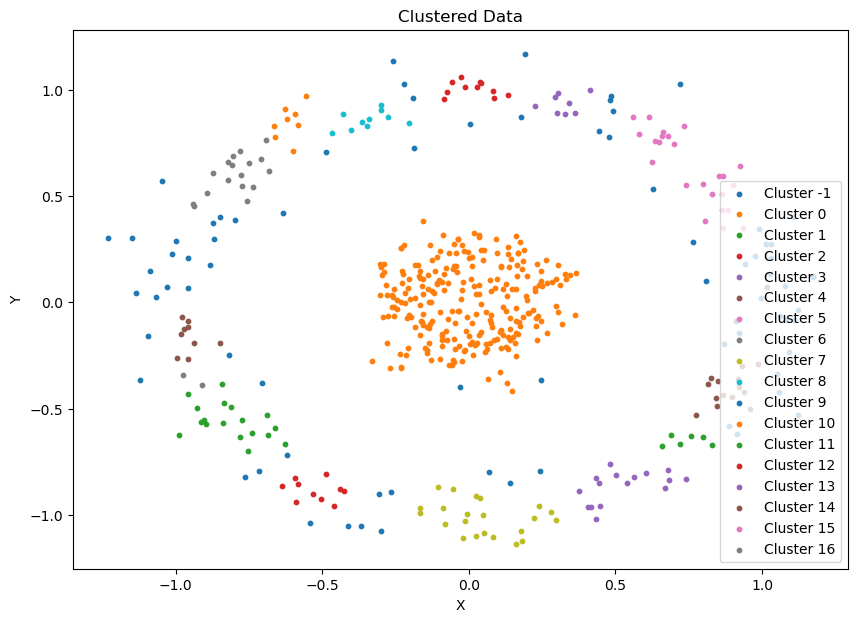

In [15]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [16]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([ 68, 248,  18,  10,  16,  14,  13,  17,  22,  10,   9,   8,   6,
        11,   8,   9,  11,   2])

> # Aggregation Dataset

In [17]:
df = pd.read_csv("/kaggle/input/iadatasets/dbscan/Aggregation.txt", sep="\t", header=None)[[0,1]]

In [18]:
df.info


<bound method DataFrame.info of          0      1
0    15.55  28.65
1    14.90  27.55
2    14.45  28.35
3    14.15  28.80
4    13.75  28.05
..     ...    ...
783   7.80   3.35
784   8.05   2.75
785   8.50   3.25
786   8.10   3.55
787   8.15   4.00

[788 rows x 2 columns]>

In [19]:
data = df.values

In [20]:
data

array([[15.55, 28.65],
       [14.9 , 27.55],
       [14.45, 28.35],
       ...,
       [ 8.5 ,  3.25],
       [ 8.1 ,  3.55],
       [ 8.15,  4.  ]])

In [21]:
eps = 1.0
min_samples = 4

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)

Cluster labels: [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  2  2  2 -1 -1 -1
 -1  1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3 -1  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  

# Calculate evaluation metrics

In [22]:
evaluation(data, dbscan.labels_)

Silhouette Score: 0.21431978441678082
Calinski-Harabasz Score: 416.1744917987363
Davies-Bouldin Score: 1.7378131348744663


     idx  cluster
0      0       -1
1      1        0
2      2        0
3      3        0
4      4        0
..   ...      ...
783  783        8
784  784        8
785  785        8
786  786        8
787  787        8

[788 rows x 2 columns]


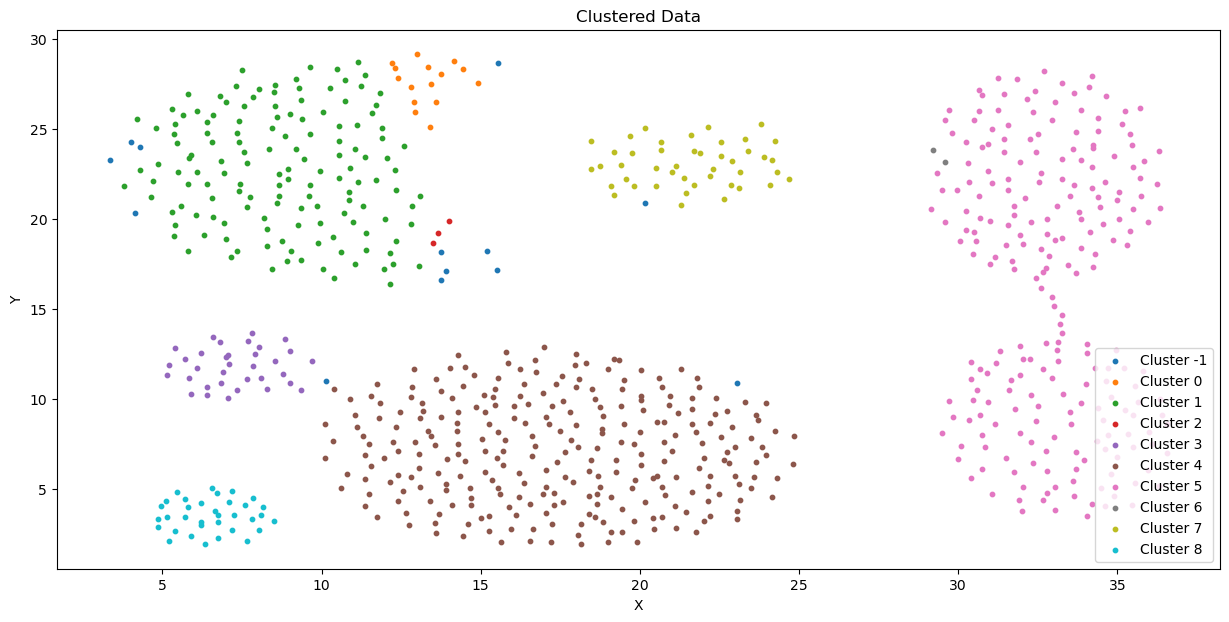

In [23]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(15, 7))
for clust in np.unique(cluster):
    plt.scatter(data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [24]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([ 13,  15, 142,   3,  34, 271, 230,   2,  44,  34])

> # Compound DataSet

In [25]:
df = pd.read_csv("/kaggle/input/iadatasets/knn-CNN-NNSRM/Compound.txt", sep="\t", header=None)[[0,1]]
data = df.values

In [26]:
eps = 1.0
min_samples = 4

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)

Cluster labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2
 -1 -1 -1 -1 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1 -1
  2  2 -1 -1 -1 -1 -1 -1 -1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  

# Calculate evaluation metrics

In [27]:
evaluation(data, dbscan.labels_)

Silhouette Score: 0.03386247320948692
Calinski-Harabasz Score: 141.0038823647434
Davies-Bouldin Score: 3.593762274863605


     idx  cluster
0      0       -1
1      1       -1
2      2       -1
3      3       -1
4      4       -1
..   ...      ...
394  394        4
395  395        4
396  396        4
397  397        4
398  398        4

[399 rows x 2 columns]


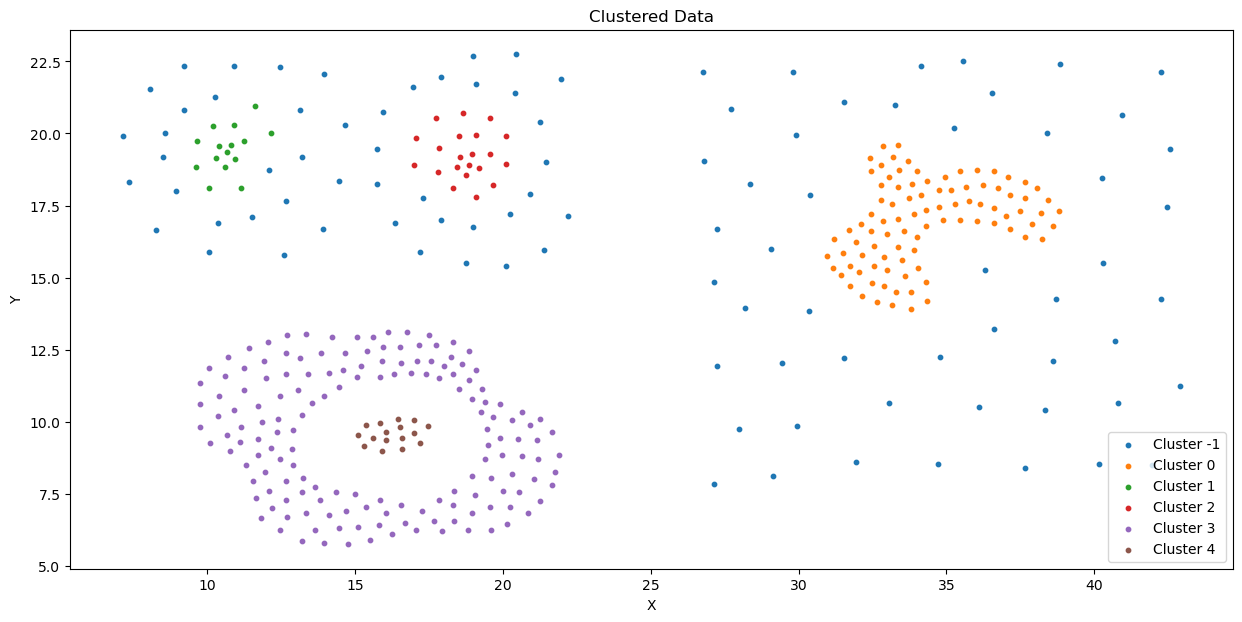

In [28]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(15, 7))
for clust in np.unique(cluster):
    plt.scatter(data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [29]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([ 97,  92,  15,  21, 158,  16])

In [30]:
df = pd.read_csv("/kaggle/input/iadatasets/dbscan/spiral.txt", sep="\t", header=None)[[0,1]]
data = df.values

In [31]:
eps = 1.0
min_samples = 3

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)

Cluster labels: [-1  0  0  0  0  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 -1  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5]


# Calculate evaluation metrics

In [32]:
evaluation(data, dbscan.labels_)

Silhouette Score: -0.10229111819976693
Calinski-Harabasz Score: 15.389184611478365
Davies-Bouldin Score: 3.0949222708427295


     idx  cluster
0      0       -1
1      1        0
2      2        0
3      3        0
4      4        0
..   ...      ...
307  307        5
308  308        5
309  309        5
310  310        5
311  311        5

[312 rows x 2 columns]


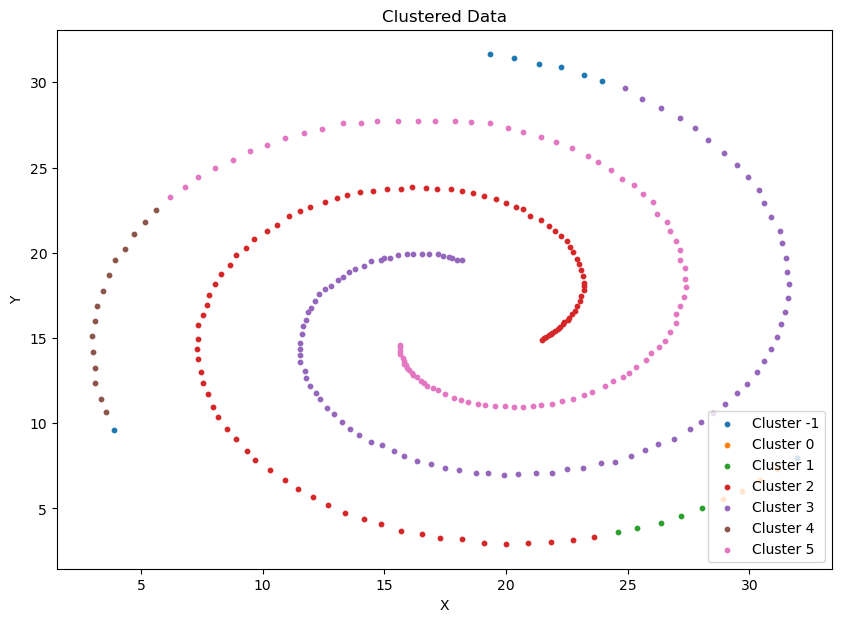

In [33]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [34]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([ 8,  4,  5, 96, 95, 15, 89])

# make Data point for analysis

In [35]:
data = np.array([[-1.5, 0.7], [-0.7, 0.6], [-0.5, 1.1], [-1, 1], [-1.5, 1.3], [-0.8, 1.3], [-0.5, 1.4], [-0.3, 1.7], [-0.1,1.5], [0, 1.9], [0.4, 1.7], [0.2,2.2], [-1, 2.5]])
X = data

In [36]:
dbscan = DBSCAN(eps=0.7, min_samples=5).fit(X)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1])

# Calculate evaluation metrics

In [37]:
evaluation(data, dbscan.labels_)

Silhouette Score: 0.2776021407540803
Calinski-Harabasz Score: 2.3270033368680143
Davies-Bouldin Score: 0.530379880342927


    idx  cluster
0     0        0
1     1        0
2     2        0
3     3        0
4     4        0
5     5        0
6     6        0
7     7        0
8     8        0
9     9        0
10   10        0
11   11        0
12   12       -1


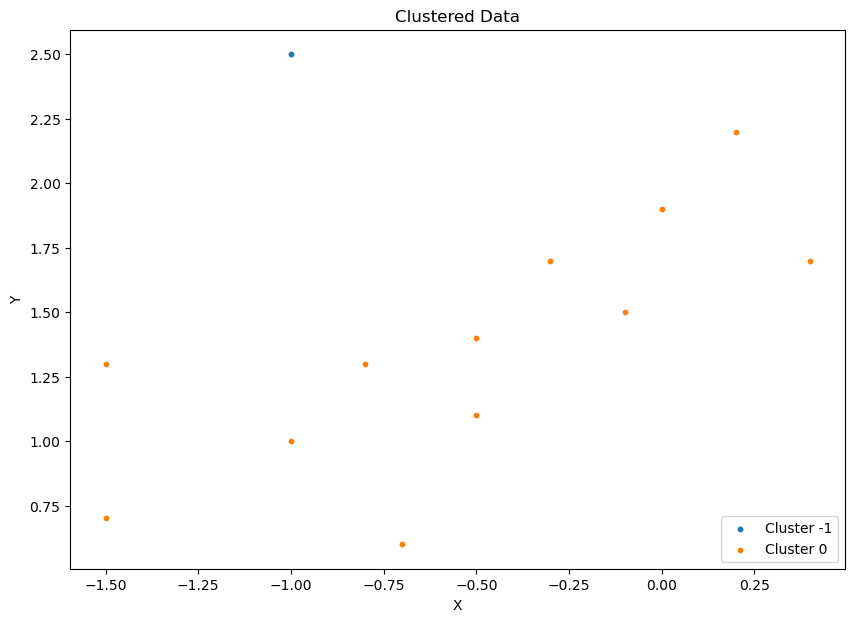

In [38]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Stroke Prediction Dataset

In [39]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [40]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [41]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [42]:
# Drop rows with NaN values in-place
df.dropna(inplace=True)
# Drop column = 'id'
df.drop(columns='id', inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


##  Unique Values

In [44]:
columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for col in columns_temp :
    print('column :', col)
    for index, unique in enumerate(df[col].unique()) :
        print(unique, ':', index)
    print('_'*45)

column : gender
Male : 0
Female : 1
Other : 2
_____________________________________________
column : ever_married
Yes : 0
No : 1
_____________________________________________
column : work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
_____________________________________________
column : smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
_____________________________________________
column : Residence_type
Urban : 0
Rural : 1
_____________________________________________


# object to nuramic convirt

In [45]:
# gender
df = df.replace(
    {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
)

# ever_married
df =  df.replace(
    {'ever_married' : {'Yes' : 0, 'No' : 1}}
)

# work_type
df =  df.replace(
    {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
)

# smoking_status
df =  df.replace(
    {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
)

# Residence_type
df =  df.replace(
    {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
)

In [46]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1


In [47]:
X = df.drop(columns='stroke')

In [48]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,0,0,228.69,36.6,0
2,0,80.0,0,1,0,0,1,105.92,32.5,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2
4,1,79.0,1,0,0,1,1,174.12,24.0,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0
...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,1,3,1,103.08,18.6,3
5106,1,81.0,0,0,0,1,0,125.20,40.0,1
5107,1,35.0,0,0,0,1,1,82.99,30.6,1
5108,0,51.0,0,0,0,0,1,166.29,25.6,0


# Normalization

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
numerical_features = X


# Standardize the data
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

display(len(numerical_features_scaled[0]))

# Apply DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=10)
cluster_labels = dbscan.fit_predict(numerical_features_scaled)

# Add cluster labels to the DataFrame
X['cluster'] = cluster_labels

# Check the distribution of clusters
print(X['cluster'].value_counts())




10

 1    4273
 2     387
 0     184
 3      53
-1      12
Name: cluster, dtype: int64


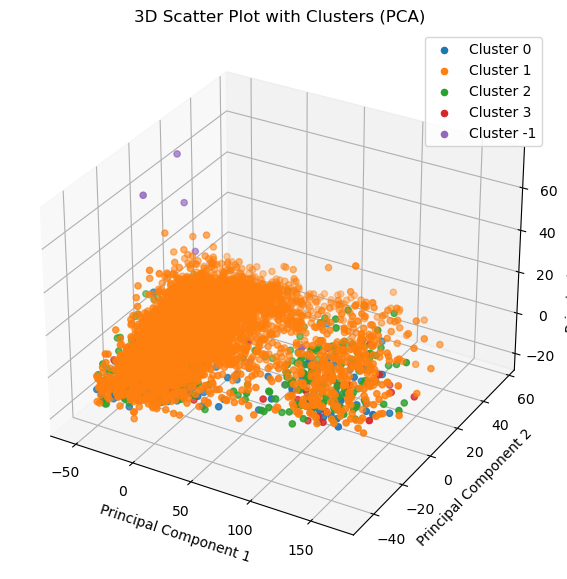

In [50]:

from sklearn.decomposition import PCA

df = X

# Separate features and labels
X = df.drop('cluster', axis=1)
y = df['cluster']

# Apply PCA to reduce the dimensionality to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a scatter plot for the first three principal components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in df['cluster'].unique():
    cluster_data = X_pca[df['cluster'] == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster}')

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot with Clusters (PCA)')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [51]:
evaluation(X.values, dbscan.labels_)

Silhouette Score: 0.19197317730423563
Calinski-Harabasz Score: 88.00655915131436
Davies-Bouldin Score: 8.924975183696338


# Fetal Health Classification Dataset

In [52]:
df = pd.read_csv("/kaggle/input/fetal-health-classification/fetal_health.csv")

In [53]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [54]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [55]:
X = df.drop(columns='fetal_health')

In [56]:

from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
numerical_features = X


# Standardize the data
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

display(len(numerical_features_scaled[0]))

# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=6)
cluster_labels = dbscan.fit_predict(numerical_features_scaled)

# Add cluster labels to the DataFrame
X['cluster'] = cluster_labels

# Check the distribution of clusters
print(X['cluster'].value_counts())




21

 0    1962
-1     137
 1      13
 3       8
 2       6
Name: cluster, dtype: int64


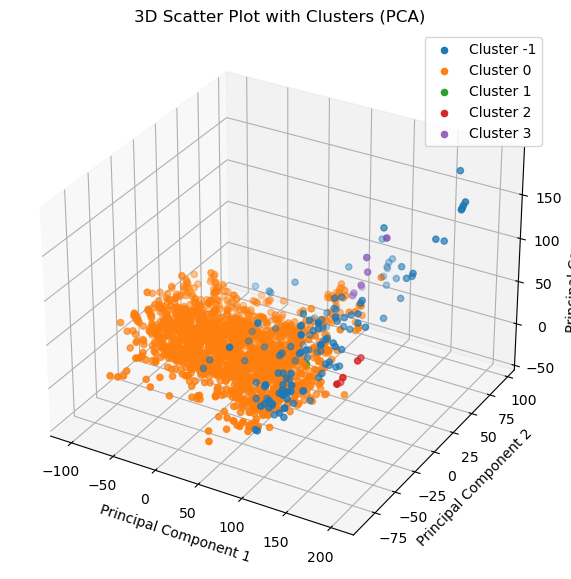

In [57]:

from sklearn.decomposition import PCA

df = X

# Separate features and labels
X = df.drop('cluster', axis=1)
y = df['cluster']

# Apply PCA to reduce the dimensionality to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a scatter plot for the first three principal components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in df['cluster'].unique():
    cluster_data = X_pca[df['cluster'] == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster}')

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot with Clusters (PCA)')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [58]:
evaluation(X.values, dbscan.labels_)

Silhouette Score: -0.0013030384661693619
Calinski-Harabasz Score: 87.52012858828256
Davies-Bouldin Score: 1.6946011055348573


# THANK YOU...!
> **If this notebook helped you, don't forget to upvote...**